<a href="https://colab.research.google.com/github/Chathura-Jayasinghe/EN3150_Assignment_03/blob/main/cnn_group_minions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the input data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)  # Add the channel dimension
test_images = test_images.reshape(-1, 28, 28, 1)

In [26]:
# Define the CNN model
model = keras.Sequential([
    # First Convolutional Layer with 32 filters and a 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer with 64 filters and a 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Flatten the 2D feature maps to a 1D array
    layers.Flatten(),

    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),

    # Add another dense layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Add the output layer with 10 units (one for each class) and softmax activation
    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
learning_rate = 0.00005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Combine training and testing data
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# First, split the data into 60% training and 40% for validation+testing
train_images, val_test_images, train_labels, val_test_labels = train_test_split(
    images, labels, test_size=0.4, random_state=42
)

# Now split the remaining 40% into 20% validation and 20% testing
val_images, test_images, val_labels, test_labels = train_test_split(
    val_test_images, val_test_labels, test_size=0.5, random_state=42
)

# Train the model using the explicit validation set
history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(val_images, val_labels),
    batch_size=1024,
    verbose=2
)

Epoch 1/20
42/42 - 5s - 114ms/step - accuracy: 0.2976 - loss: 2.2458 - val_accuracy: 0.4340 - val_loss: 2.1705
Epoch 2/20
42/42 - 1s - 17ms/step - accuracy: 0.5104 - loss: 2.0449 - val_accuracy: 0.5745 - val_loss: 1.8705
Epoch 3/20
42/42 - 1s - 29ms/step - accuracy: 0.6410 - loss: 1.6461 - val_accuracy: 0.7078 - val_loss: 1.3885
Epoch 4/20
42/42 - 1s - 16ms/step - accuracy: 0.7597 - loss: 1.1570 - val_accuracy: 0.8007 - val_loss: 0.9373
Epoch 5/20
42/42 - 1s - 30ms/step - accuracy: 0.8260 - loss: 0.7897 - val_accuracy: 0.8451 - val_loss: 0.6680
Epoch 6/20
42/42 - 1s - 30ms/step - accuracy: 0.8618 - loss: 0.5829 - val_accuracy: 0.8745 - val_loss: 0.5208
Epoch 7/20
42/42 - 1s - 16ms/step - accuracy: 0.8827 - loss: 0.4687 - val_accuracy: 0.8876 - val_loss: 0.4348
Epoch 8/20
42/42 - 1s - 33ms/step - accuracy: 0.8949 - loss: 0.3984 - val_accuracy: 0.8992 - val_loss: 0.3790
Epoch 9/20
42/42 - 1s - 27ms/step - accuracy: 0.9050 - loss: 0.3509 - val_accuracy: 0.9078 - val_loss: 0.3406
Epoch 10/

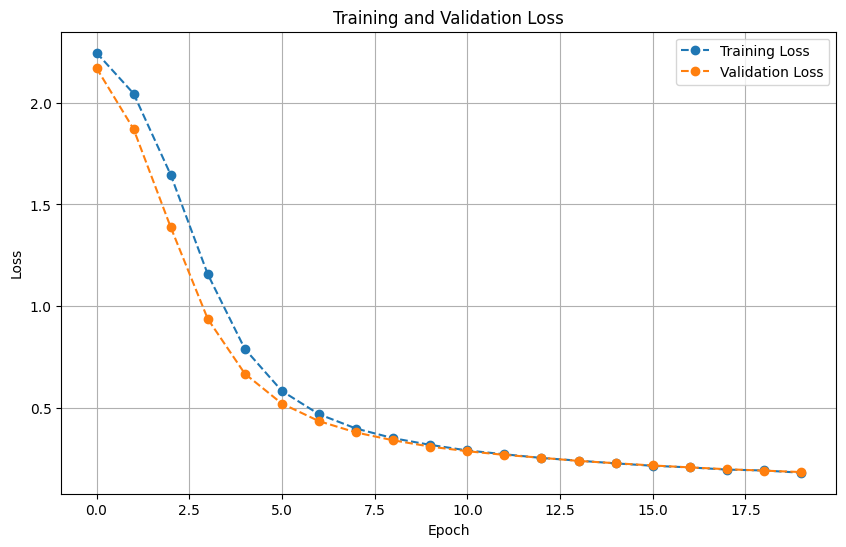

In [29]:
import matplotlib.pyplot as plt
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9459 - loss: 0.1879
Test Loss: 0.19079414010047913
Test Accuracy: 0.9450713992118835


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Shape of test_labels: (14000,)
Classification Report as Table:

              precision    recall  f1-score       support
Class 0        0.960635  0.980268  0.970352   1419.000000
Class 1        0.960784  0.975731  0.968200   1607.000000
Class 2        0.943878  0.923022  0.933333   1403.000000
Class 3        0.949568  0.917189  0.933097   1437.000000
Class 4        0.940529  0.966063  0.953125   1326.000000
Class 5        0.937249  0.932746  0.934992   1249.000000
Class 6        0.954711  0.967432  0.961029   1351.000000
Class 7        0.948113  0.945565  0.946837   1488.000000
Class 8        0.923611  0.907506  0.915488   1319.000000
Class 9        0.926031  0.929336  0.927681   1401.000000
accuracy       0.945071  0.945071  0.945071      0.945071
macro avg      0.944511  0.944486  0.944413  14000.000000
weighted avg   0.944993  0.945071  0.944947  14000.000000


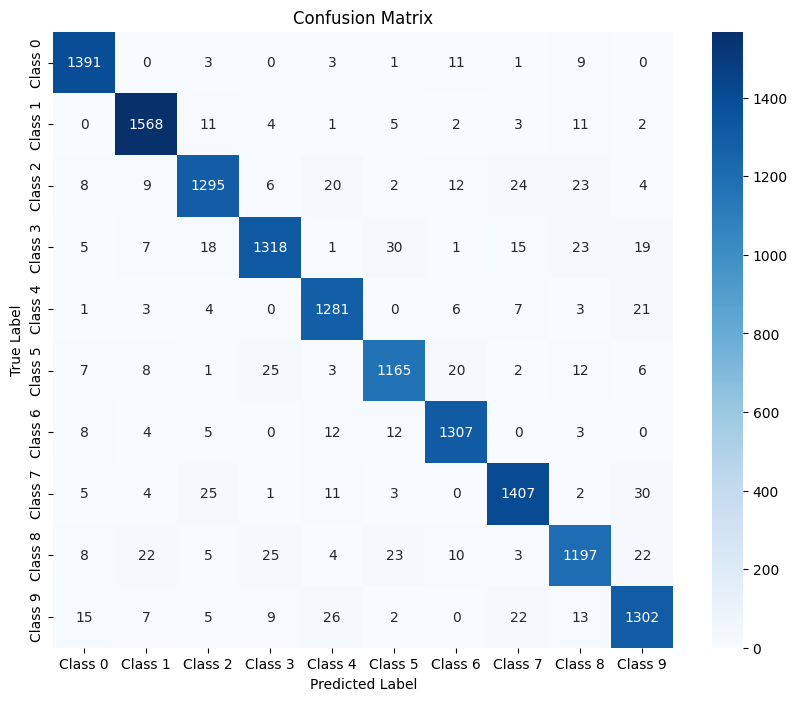

In [33]:
# Get predictions for the test set
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)  # Get class labels

# Shape of test_labels is already 1D (not one-hot encoded)
print("Shape of test_labels:", test_labels.shape)
test_labels_classes = test_labels  # It's already in class label format

# Generate classification report
report_dict = classification_report(test_labels_classes, test_predictions_classes,
                                     target_names=[f'Class {i}' for i in range(10)],
                                     output_dict=True)

# Convert the report to a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the report as a table
print("Classification Report as Table:\n")
print(report_df)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels_classes, test_predictions_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {i}' for i in range(10)],
            yticklabels=[f'Class {i}' for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Saving image.jpg to image (2).jpg


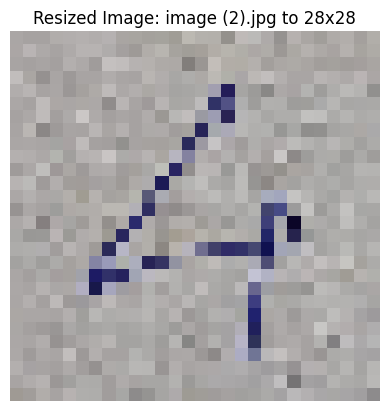

Final shape of the image: (3, 28, 28, 1)


In [36]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Upload an image
uploaded = files.upload()

# Process and display the uploaded images
for filename in uploaded.keys():
    # Read the image
    img = cv2.imread(filename)

    # Resize the image to 28x28 pixels
    resized_img = cv2.resize(img, (28, 28))  # Resize to (28, 28)

    # Convert color from BGR to RGB
    resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

    # Add a channel dimension and convert to a suitable format
    final_img = resized_img_rgb.reshape(-1, 28, 28, 1)  # Shape (-1, 28, 28, 1)

    # Display the resized image
    plt.imshow(resized_img_rgb)
    plt.axis('off')  # Hide axis
    plt.title(f'Resized Image: {filename} to 28x28')
    plt.show()

    # Print the final shape
    print("Final shape of the image:", final_img.shape)
